In [ ]:
%conda install -y gdown

In [2]:
from IPython.display import FileLinks, FileLink
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Rescaling, Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.utils import plot_model, load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.config import list_physical_devices
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import gdown
import zipfile
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [ ]:
url = 'https://drive.google.com/uc?id=1Oc_O7dtjeGtfApX9Qv15AxUqVyzAssHD'
output = 'amanita.zip'
gdown.download(url, output)

url = 'https://drive.google.com/uc?id=1CUsxZERiIvV9BHnaSxMyhfjP6jLhtbVP'
output = 'boletus.zip'
gdown.download(url, output)

url = 'https://drive.google.com/uc?id=11ICEn_OFhwd78mUemOYb146WcqFIhlv8'
output = 'cantharellus.zip'
gdown.download(url, output)

url = 'https://drive.google.com/uc?id=18I07wDMnJOG1oADg2fFR4jVFiIqgPG3r'
output = 'morchella.zip'
gdown.download(url, output)

In [4]:
zip_ref = zipfile.ZipFile("/kaggle/working/amanita.zip", 'r')
zip_ref.extractall("/kaggle/working/data/dataset_augmented")
zip_ref.close()

zip_ref = zipfile.ZipFile("/kaggle/working/boletus.zip", 'r')
zip_ref.extractall("/kaggle/working/data/dataset_augmented")
zip_ref.close()

zip_ref = zipfile.ZipFile("/kaggle/working/cantharellus.zip", 'r')
zip_ref.extractall("/kaggle/working/data/dataset_augmented")
zip_ref.close()

zip_ref = zipfile.ZipFile("/kaggle/working/morchella.zip", 'r')
zip_ref.extractall("/kaggle/working/data/dataset_augmented")
zip_ref.close()

In [5]:
os.listdir('/kaggle/working/data/dataset_augmented')

['test', 'train']

In [6]:
os.listdir('/kaggle/working/data/dataset_augmented/test')

['boletus', 'morchella', 'amanita', 'cantharellus']

In [7]:
os.listdir('/kaggle/working/data/dataset_augmented/train')

['boletus', 'morchella', 'amanita', 'cantharellus']

In [8]:
batch_size = 64
img_height = 224
img_width = 224
epochs = 100
seed = 27
validation_split = 0.2

training_data_path = '/kaggle/working/data/dataset_augmented/train'
test_data_path = '/kaggle/working/data/dataset_augmented/test'
model_path = '/kaggle/working/models/final_models/vgg16.h5'

class_names = ['amanita', 'boletus', 'cantharellus', 'morchella']

In [9]:
print("Num GPUs Available: ", len(list_physical_devices('GPU')))

Num GPUs Available:  1


## Training and validation data

In [10]:
training_data = image_dataset_from_directory(
    directory=training_data_path,
    validation_split=validation_split,
    subset='training',
    labels='inferred',
    class_names=class_names,
    label_mode='int',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    seed=seed,
    shuffle=True
)

validation_data = image_dataset_from_directory(
    directory=training_data_path,
    validation_split=validation_split,
    subset='validation',
    labels='inferred',
    class_names=class_names,
    label_mode='int',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    seed=seed,
    shuffle=True
)

Found 16206 files belonging to 4 classes.
Using 12965 files for training.
Found 16206 files belonging to 4 classes.
Using 3241 files for validation.


## VGG16 architecture

In [11]:
# VGG16 architecture
model = Sequential([
    # Rescaling layer
    Rescaling(
        scale=1. / 255,
        input_shape=(img_height, img_width, 3),
        name='rescale'
    ),
    
    # CONV -> CONV -> POOL
    Conv2D(
        filters=64,
        kernel_size=(3, 3),
        padding='same',
        activation='relu',
        name='conv2d_1_1'
    ),
    Conv2D(
        filters=64,
        kernel_size=(3, 3),
        padding='same',
        activation='relu',
        name='conv2d_1_2'
    ),
    MaxPooling2D(
        pool_size=(2, 2),
        strides=(2, 2),
        name='maxpool2d_1'
    ),
    Dropout(
        rate=0.2,
        name='dropout_1'
    ),
    
    # CONV -> CONV -> POOL
    Conv2D(
        filters=128,
        kernel_size=(3, 3),
        padding='same',
        activation='relu',
        name='conv2d_2_1'
    ),
    Conv2D(
        filters=128,
        kernel_size=(3, 3),
        padding='same',
        activation='relu',
        name='conv2d_2_2'
    ),
    MaxPooling2D(
        pool_size=(2, 2),
        strides=(2, 2),
        name='maxpool2d_2'
    ),
    Dropout(
        rate=0.2,
        name='dropout_2'
    ),
    
    # CONV -> CONV -> CONV -> POOL
    Conv2D(
        filters=256,
        kernel_size=(3, 3),
        padding='same',
        activation='relu',
        name='conv2d_3_1'
    ),
    Conv2D(
        filters=256,
        kernel_size=(3, 3),
        padding='same',
        activation='relu',
        name='conv2d_3_2'
    ),
    Conv2D(
        filters=256,
        kernel_size=(3, 3),
        padding='same',
        activation='relu',
        name='conv2d_3_3'
    ),
    MaxPooling2D(
        pool_size=(2, 2),
        strides=(2, 2),
        name='maxpool2d_3'
    ),
    Dropout(
        rate=0.2,
        name='dropout_3'
    ),

    # CONV -> CONV -> CONV -> POOL
    Conv2D(
        filters=512,
        kernel_size=(3, 3),
        padding='same',
        activation='relu',
        name='conv2d_4_1'
    ),
    Conv2D(
        filters=512,
        kernel_size=(3, 3),
        padding='same',
        activation='relu',
        name='conv2d_4_2'
    ),
    Conv2D(
        filters=512,
        kernel_size=(3, 3),
        padding='same',
        activation='relu',
        name='conv2d_4_3'
    ),
    MaxPooling2D(
        pool_size=(2, 2),
        strides=(2, 2),
        name='maxpool2d_4'
    ),
    Dropout(
        rate=0.2,
        name='dropout_4'
    ),
    
    # CONV -> CONV -> CONV -> POOL
    Conv2D(
        filters=512,
        kernel_size=(3, 3),
        padding='same',
        activation='relu',
        name='conv2d_5_1'
    ),
    Conv2D(
        filters=512,
        kernel_size=(3, 3),
        padding='same',
        activation='relu',
        name='conv2d_5_2'
    ),
    Conv2D(
        filters=512,
        kernel_size=(3, 3),
        padding='same',
        activation='relu',
        name='conv2d_5_3'
    ),
    MaxPooling2D(
        pool_size=(2, 2),
        strides=(2, 2),
        name='maxpool2d_5'
    ),
    Dropout(
        rate=0.2,
        name='dropout_5'
    ),

    # Flattening -> FC -> FC -> FC
    Flatten(
        name='flatten'
    ),
    Dense(
        units=4096, 
        activation='relu',
        name='fc_1'
    ),
    Dropout(
        rate=0.5,
        name='dropout_6'
    ),
    Dense(
        units=4096, 
        activation='relu',
        name='fc_2'
    ),
    Dropout(
        rate=0.5,
        name='dropout_7'
    ),
    Dense(
        units=len(class_names), # number of classes 
        activation='softmax',
        name='fc_output'
    )
])

### Compile model and see its summary

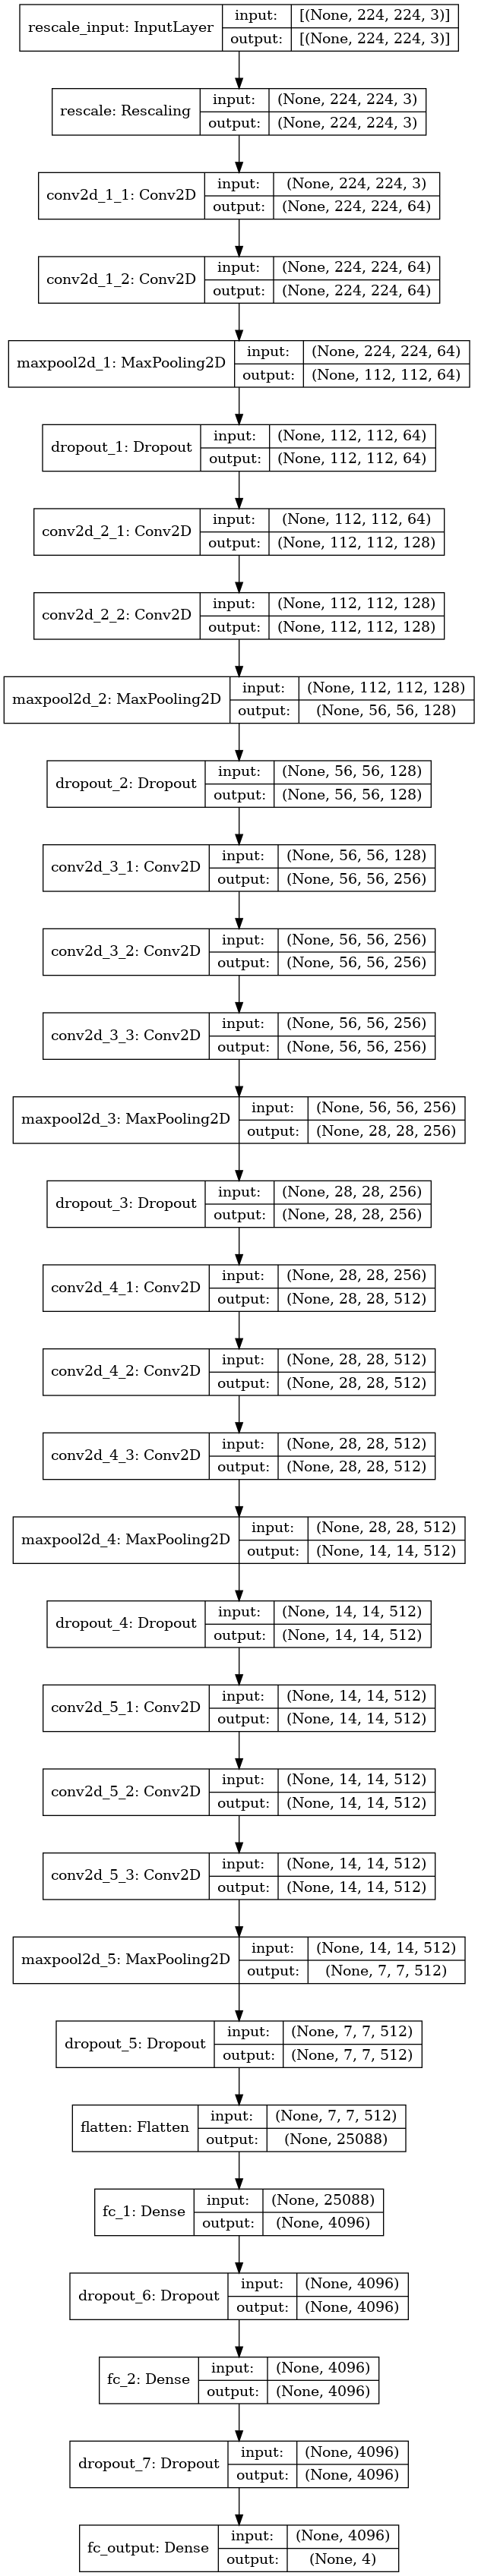

In [12]:
model.compile(
    optimizer=SGD(learning_rate=0.001, momentum=0.9),
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

plot_model(
    model, 
    to_file='vgg16_plot.png', 
    show_shapes=True,
    show_layer_names=True
)

### Define callbacks

In [13]:
early_stopping_callback = EarlyStopping(
    monitor='val_loss', 
    mode='min', 
    verbose=1,
    patience=10,
    restore_best_weights=True
)

callbacks = [
    early_stopping_callback
]

### Fit and train

In [14]:
history = model.fit(
    training_data,
    validation_data=validation_data,
    epochs=epochs,
    callbacks=callbacks,
    shuffle=True
)

Epoch 1/100
203/203 [==============================] - 122s 533ms/step - loss: 1.3854 - accuracy: 0.2720 - val_loss: 1.3852 - val_accuracy: 0.3545
Epoch 2/100
203/203 [==============================] - 100s 491ms/step - loss: 1.3809 - accuracy: 0.3115 - val_loss: 1.3773 - val_accuracy: 0.3305
Epoch 3/100
203/203 [==============================] - 99s 486ms/step - loss: 1.3318 - accuracy: 0.3413 - val_loss: 1.2493 - val_accuracy: 0.4131
Epoch 4/100
203/203 [==============================] - 99s 485ms/step - loss: 1.2180 - accuracy: 0.4294 - val_loss: 1.1788 - val_accuracy: 0.4733
Epoch 5/100
203/203 [==============================] - 101s 491ms/step - loss: 1.1098 - accuracy: 0.4943 - val_loss: 1.0307 - val_accuracy: 0.5218
Epoch 6/100
203/203 [==============================] - 101s 490ms/step - loss: 0.9273 - accuracy: 0.5792 - val_loss: 0.8181 - val_accuracy: 0.6149
Epoch 7/100
203/203 [==============================] - 101s 490ms/step - loss: 0.7204 - accuracy: 0.6806 - val_loss: 0.7

### Save the model

In [15]:
model.save(model_path)

### Load metrics to dataframe

In [16]:
metrics_df = pd.DataFrame(history.history)

### Accuracy plot

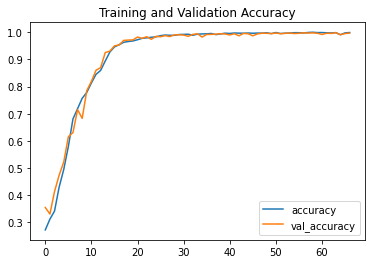

In [17]:
metrics_df[["accuracy", "val_accuracy"]].plot()
plt.title('Training and Validation Accuracy')
plt.savefig('accuracy.png')
plt.show()

### Loss plot

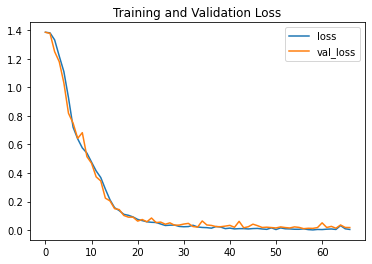

In [18]:
metrics_df[["loss", "val_loss"]].plot()
plt.title('Training and Validation Loss')
plt.savefig('loss.png')
plt.show()

## Test the model

### Define prediction function

In [19]:
def predict_and_evaluate(images, labels, class_names):
    test_data_batch = np.array(images)
    print(test_data_batch.shape)
    
    predictions = model.predict(test_data_batch)
    predicted_labels = np.argmax(predictions, axis = 1)
    
    hits = 0

    for predicted_label, prediction, label in zip(predicted_labels, predictions, labels):        
        probability = np.max(prediction) * 100
        print(
            "{} with {:.2f}% probability (real class: {})".format(
                class_names[predicted_label],
                probability,
                class_names[label]
            )
        )
        
        hits = hits + 1 if label == predicted_label else hits      
        
    accuracy = (hits / len(labels)) * 100
    return accuracy, predicted_labels
        

### Load test data

In [20]:
images = list()
labels = list()

for class_name in class_names:
    class_path = os.path.join(test_data_path, class_name)
    for image in os.listdir(class_path):
        image_path = os.path.join(class_path, image)
        image_data = load_img(
            image_path,
            target_size=(img_height, img_width),
            color_mode='rgb'
        )
        image_array = img_to_array(image_data)
        images.append(image_array)
        labels.append(class_names.index(class_name))


### Run prediction

In [21]:
accuracy, predicted_labels = predict_and_evaluate(images, labels, class_names)
print("Accuracy is {:.2f}%".format(accuracy))

(97, 224, 224, 3)
amanita with 100.00% probability (real class: amanita)
amanita with 100.00% probability (real class: amanita)
amanita with 100.00% probability (real class: amanita)
amanita with 100.00% probability (real class: amanita)
amanita with 100.00% probability (real class: amanita)
amanita with 100.00% probability (real class: amanita)
amanita with 100.00% probability (real class: amanita)
amanita with 100.00% probability (real class: amanita)
amanita with 100.00% probability (real class: amanita)
amanita with 100.00% probability (real class: amanita)
amanita with 100.00% probability (real class: amanita)
amanita with 100.00% probability (real class: amanita)
amanita with 100.00% probability (real class: amanita)
amanita with 100.00% probability (real class: amanita)
amanita with 100.00% probability (real class: amanita)
amanita with 100.00% probability (real class: amanita)
amanita with 100.00% probability (real class: amanita)
amanita with 100.00% probability (real class: a

In [22]:
evaluation = model.evaluate(
    x=np.array(images),
    y=np.array(labels),
    batch_size=batch_size
)
print("Loss is {:.4f}".format(evaluation[0]))
print("Accuracy is {:.2f}%".format(100 * evaluation[1]))

2/2 [==============================] - 4s 3s/step - loss: 0.5341 - accuracy: 0.9588
Loss is 0.5341
Accuracy is 95.88%


In [23]:
print(classification_report(labels, predicted_labels, target_names=class_names))

              precision    recall  f1-score   support

     amanita       1.00      1.00      1.00        28
     boletus       0.95      1.00      0.98        21
cantharellus       0.96      0.88      0.92        25
   morchella       0.92      0.96      0.94        23

    accuracy                           0.96        97
   macro avg       0.96      0.96      0.96        97
weighted avg       0.96      0.96      0.96        97



### Confusion matrix

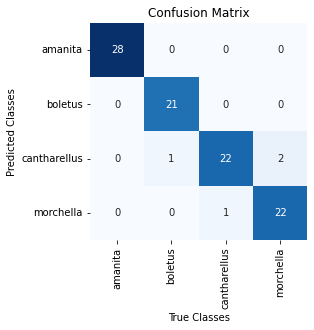

In [24]:
matrix = confusion_matrix(labels, predicted_labels)

sns.heatmap(
    matrix,
    square=True,
    annot=True,
    cbar=False,
    cmap=plt.cm.Blues,
    xticklabels=class_names,
    yticklabels=class_names
)

plt.xlabel('True Classes')
plt.ylabel('Predicted Classes');
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show();

### Download the model

In [25]:
os.chdir('/kaggle/working')

In [ ]:
os.getcwd()

In [ ]:
FileLinks('./models')

In [ ]:
FileLink('vgg16_plot.png')

In [ ]:
FileLink('accuracy.png')

In [ ]:
FileLink('loss.png')

In [ ]:
FileLink('confusion_matrix.png')